In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
from mpl_toolkits import mplot3d
from matplotlib.patches import FancyArrowPatch,Rectangle,Circle
from mpl_toolkits.mplot3d import art3d

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,linspace,array,arange,meshgrid

from ipykernel.pylab.backend_inline import flush_figures

from scipy.integrate import quad, dblquad, tplquad

%matplotlib inline

plt.rcParams.update({
    "figure.figsize": (6,6),
    "text.usetex": True,
    "font.family": "serif",
})

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')
# plt.style.use('Solarize_Light2')

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$

# One-minute Review

Compute the following line integral. 
 $$\int_C \left(x y e^{-x y}-e^{-x y}\right)\,dx + x^2 e^{-x y}\,dy$$ where $C$ is oriented curve below. 

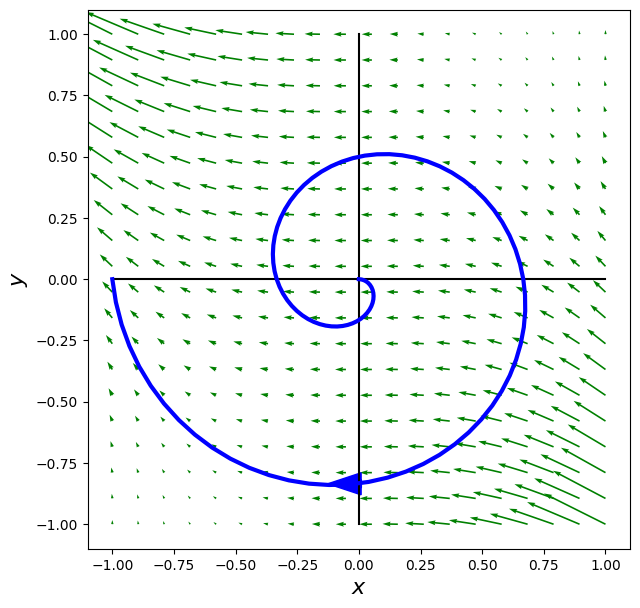

In [2]:
x = y = np.linspace(-1,1,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,x*y*exp(-x*y)-exp(-x*y),exp(-x*y)*x**2,color='g');
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
# plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
plt.arrow(0.01,-.835,-.001,0,width=.03,color='b')
plt.plot([0,0],[-1,1],'k')
plt.plot([-1,1],[0,0],'k')
plt.plot((1-t)*cos(t*6*pi/2-pi),(1-t)*sin(t*6*pi/2-pi),'b',lw=3);

#### Solution

As you might guess because there is no obvious parametrization for that curve, this is a conservative vector field with potential $$f(x,y) = -x e^{-xy}$$

So the integral is simply $f(-1,0) - f(0,0) = 1$.

In [3]:
# let's check the hard way.

F = lambda x,y: (x*y*exp(-x*y)-exp(-x*y),exp(-x*y)*x**2)

quad(lambda t: np.dot(F(t*cos(t)/(3*pi),-t*sin(t)/(3*pi)),(cos(t)/(3*pi) - t*sin(t)/(3*pi),-sin(t)/(3*pi) - t*cos(t)/(3*pi))),0,3*pi)

(0.9999999999999996, 7.487341837710568e-09)

#### 
<p style="padding-bottom:40%;"> </p>

# Examples

  1. Compute the line integral of $\vec F(x,y) =\langle (xy - y^2) , x^2\rangle$ on the triangular curve connecting $(0,0)$, $(2,0)$, and $(3,2)$ counterclockwise.

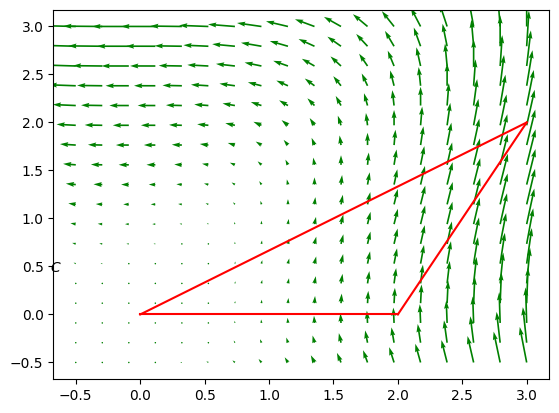

In [4]:
r1 = lambda t: np.array([2*t,0*t])
r2 = lambda t: np.array([2 + t, 2*t])
r3 = lambda t: np.array([3*t,2*t])
t = np.linspace(0,1,100)
plt.plot(*r1(t),'-r')
plt.plot(*r2(t),'-r')
plt.plot(*r3(t),'-r')
plt.text(-.7,.45,"$C$");
u = np.linspace(-1/2,3,18) 
v = np.linspace(-1/2,3,18)
x,y = np.meshgrid(u,v)
plt.quiver(x,y,y*x -y**2,x**2,color='g');


#### Solution

$$ \int_C \vec F\cdot d\vec r  = \int_0^2 \int_{3/2 y}^{2+ y/2} (2x - (x - 2y)) dx \,dy$$

To compute around the curve, we parameterize each leg. Call the bottom $C_1$, the right $C_2$, and the top $C_3$. 

$\displaystyle C_1: \vec r(t) = \langle t,0 \rangle$ for $0\leq t \leq 2$

$\displaystyle C_2: \vec r(t) = \langle 2 + t,2t \rangle$ for $0\leq t \leq 1$

$\displaystyle C_1: \vec r(t) = \langle 3 - 3t,2 - 2t \rangle$ for $0\leq t \leq 1$

Then compute each line integral $\int_a^b \vec F(\vec r(t))\cdot \vec r'(t)\,dt$ and add them up. 

$$\int_0^2 \vec F(t,0)\cdot \langle 1,0 \rangle dt + \int_0^1 \vec F(2 + t,2t)\cdot \langle 1,2 \rangle dt + \int_0^1 \vec F(3-3t,2-2t)\cdot \langle -3,-2 \rangle dt $$

Computed numerically, we get $6$ for both.

In [5]:
dblquad(lambda x,y: x + 2*y,0,2,lambda y: 3/2*y,lambda y: 2 + y/2)[0]

6.0

In [6]:
def F(x,y):
    return (x*y - y**2,x**2)

I1 = quad(lambda t: np.dot(F(t,0),(1,0)),0,2)[0]
I2 = quad(lambda t: np.dot(F(2 + t,2*t),(1,2)),0,1)[0]
I3 = quad(lambda t: np.dot(F(3 - 3*t,2 - 2*t),(-3,-2)),0,1)[0]

I1 + I2 + I3

6.0

#### 
<p style="padding-bottom:40%;"> </p>

### Area

Question: Can you find the surface area of Central Park's Jackie Onassis Reservoir if you cannot swim?

Area: Sure. One just needs a GPS watch. 

Consider $C$ the ccw boundary of a region $\mathcal D$. then 

$$\oint_C x\, dy = \iint_\mathcal D 1\,dA = \text{Area}(\mathcal D) $$

![A picture of the Central Park reservoir with vector field overlay](../img/reservoir.png)

[Solution in `reservoir.ipynb` notebook](../extras/reservoir.ipynb)

<p style="padding-bottom:40%;"> </p>

### Area

Equivalently,

$$\text{Area}(\mathcal D) = \oint_{\partial \mathcal D} (-y)\,dx = \frac12 \oint_{\partial\mathcal D}x\,dy  -y\,dx $$

## Example

Let $\mathcal{R}$ be the rectangular region $[a,b]\times [c,d]$. Let $C$ be its counter-clockwise oriented boundary. Compute 

$$\oint_C \langle  0,x\rangle \cdot d\vec r$$

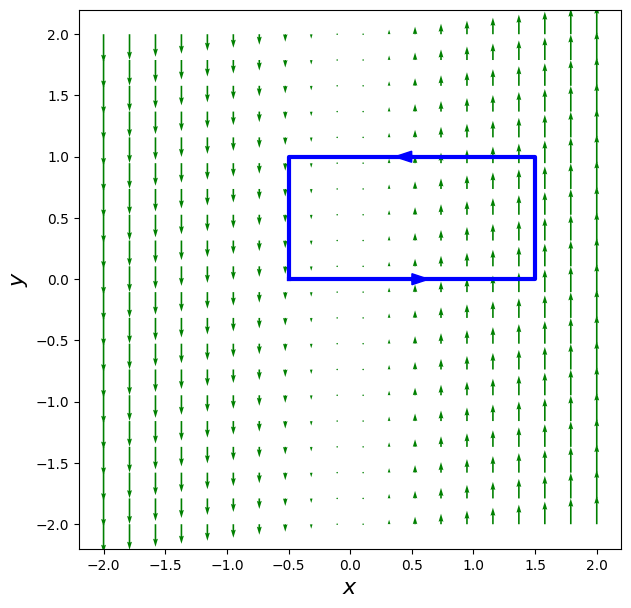

In [7]:
x = y = np.linspace(-2,2,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,0,x,color='g');
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
plt.plot([-1/2,3/2,3/2,-1/2,-1/2],[0,0,1,1,0],'b',lw=3);
plt.arrow(1/2,0,.001,0,color='b',width=.03)
plt.arrow(1/2,1,-.001,0,color='b',width=.03);

#### Solution

Of course, directly or by using Green's, we get $(b-a)(d-c)$, width times height.

#### 
<p style="padding-bottom:40%;"> </p>

### Exercise

Let $C$ be the curve tracing the boundary of the unit square (corners at $(0,0)$, $(1,0)$, $(1,1)$, and $(0,1)$) oriented counterclockwise. 

Let $ \vec F(x,y) = \langle 3, -  \frac{x^2}{2}\rangle$. Compute $\displaystyle \oint_C \vec F\cdot d\vec r$. 

Which is faster? Direct computation or using Green's Theorem?

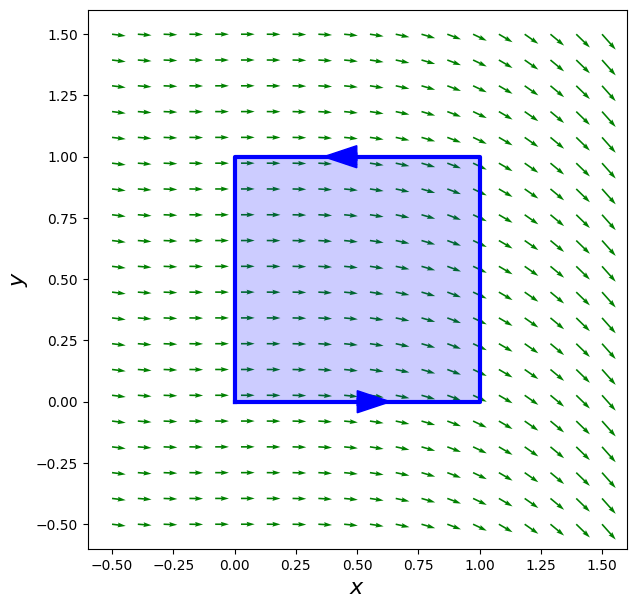

In [8]:
x = y = np.linspace(-1/2,3/2,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,0*x + 1,-x**2/2,color='g');
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
plt.gca().set_aspect('equal')
plt.plot([0,1,1,0,0],[0,0,1,1,0],'b',lw=3);
plt.fill([0,1,1,0,0],[0,0,1,1,0],'b',alpha=.2);

plt.arrow(1/2,0,.001,0,color='b',width=.03)
plt.arrow(1/2,1,-.001,0,color='b',width=.03);

#### Solution

Either way, you should get $-\frac12$.

#### 
<p style="padding-bottom:40%;"> </p>